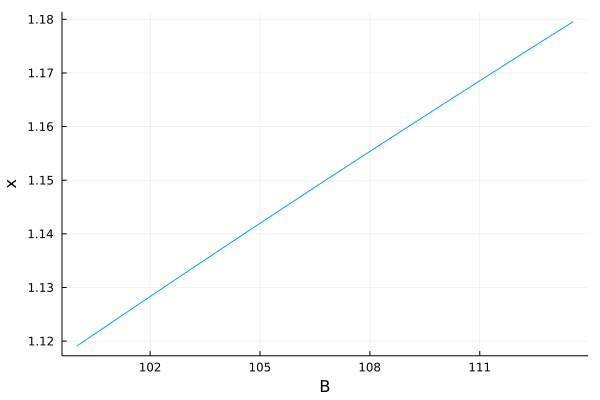

In [21]:
using BifurcationKit, Plots, Setfield, Parameters, LinearAlgebra, ForwardDiff, Revise
const BK = BifurcationKit

function budworm!(dz, z, p, t)
    @unpack Rs, Re, Ks, Ke, P, B = p
    S, E = z
    dz[1] = Rs*S*(1-(S*Ke)/(E*Ks))
    dz[2] = Re*E*(1-E/Ke)-(P*B)/S
    dz
end

budworm(z, p) = budworm!(similar(z), z, p, 0)

dbudworm(z,p) = ForwardDiff.jacobian(x -> budworm(x,p), z)
jet = BK.getJet(budworm, dbudworm)

opts = ContinuationPar(pMin = 0., pMax = 1000., detectBifurcation = 3)

params = (Rs = 100., Re = 95., Ks = 1.1, Ke = 1.2, P = 1., B = 100.)
#what are some reasonable initial parameters for this system? Find better ones than these.

br, = continuation(budworm, dbudworm, [-2.,-1.], params, (@lens _.B), opts; printSolution = (x,p) -> (S = x[1], E = x[2]))

plot(br)
